# Tutorial and Demo

## Simulator Block Scheme

- Absorption filters and reflection filter are now time varying $\longrightarrow$ cannot be swapped
- We need two delay line blocks to implement the whole model
    - Higher computational complexity
    - Double Interpolation operation
    - Higher physical accuracy

<img src='block_scheme.png'>

## Filters Implementation

In [1]:
# Explain the goal of the simulator and the usecase it is designed for

# Show the architecture of the simulator

# Explain the filtering steps


In [2]:
# Tutorial on how to set up the simulation

# Definition of the environment

# Definition of the length of the filters and of the interpolation (accuracy vs performance)

# Definition of source signals and background noise to be added to the simulation

# Generation of microphone received signals

(76175,)


/var/folders/49/32jmkqsd7034c_6y1h_xgk080000gn/T/ipykernel_19159/989249956.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, noise = wavfile.read('ambient.wav')


2.8315510749816895


Text(0.5, 0, 'Time [s]')

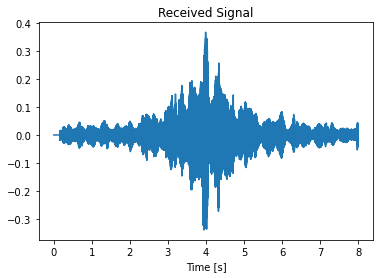

In [6]:
# Define simulation environment with moving source and random signal
import pyroadacoustics as pyroad
import numpy as np
import scipy.signal

from scipy.io import wavfile
samplerate, data = wavfile.read('siren.wav')
data = scipy.signal.resample(data, int(len(data) * 8000 / samplerate))

data = np.reshape(data[:,0], (-1, 1))
data = data / max(data)
data = np.reshape(data, -1)
print(np.shape(data))


samplerate, noise = wavfile.read('ambient.wav')
noise = scipy.signal.resample(noise, int(len(noise) * 8000 / samplerate))

noise = np.reshape(noise[44100:120000,0], (-1, 1))
noise = noise / max(noise)
noise = np.reshape(noise, -1)
noise = noise[16000:]


fs = 8000
t = np.arange(0,5,1/fs)
f = 2000
env = pyroad.Environment(fs = fs)
# src_signal = np.sin(2 * np.pi * f * t)
src_signal = data
# src_signal = np.random.randn(len(t))
env.add_source(np.array([3,5,1]), trajectory_points=np.array([[3,20,1], [3,-20,1]]), source_velocity=np.array([5]), signal=src_signal)
env.add_microphone_array(np.array([[0,0,1]]))
# env.set_background_noise(noise, SNR=0)
env.set_simulation_params("Allpass", True, True)
import time
start_time = time.time()
signal = env.simulate()
print(time.time() - start_time)
# Run simulation and plot signals received at microphone array
import matplotlib.pyplot as plt
plt.plot(np.arange(len(signal[0]))/fs, signal[0])
plt.title('Received Signal')
plt.xlabel('Time [s]')

# Plot spectrogram of received signal to show doppler

# Show comb filtering effect using FFT representations

# Listen to signal produced by simulator

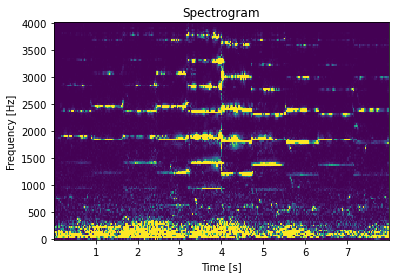

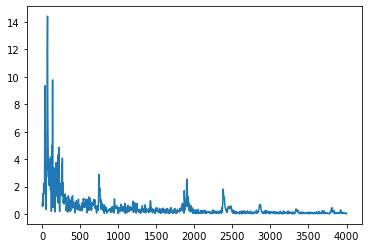

In [4]:
import scipy.signal
from scipy.io.wavfile import write

plt.figure()
ff, tt, Sxx = scipy.signal.spectrogram(signal[0], fs = fs)
plt.pcolormesh(tt, ff, Sxx, shading='auto', vmax = 0.000002)
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

write('output.wav', fs, signal[0])


Nfft = 2048
f_axis = np.linspace(0, fs / 2, int(Nfft / 2 + 1))
fft_signal = np.fft.fft(signal[0], Nfft)
plt.figure()
plt.plot(f_axis, abs(fft_signal[:int(Nfft/2 + 1)]))



2.110797882080078


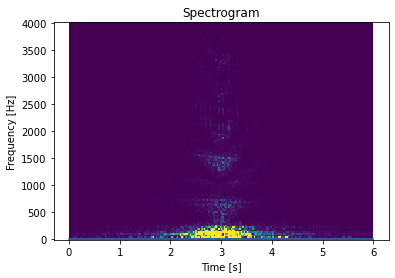

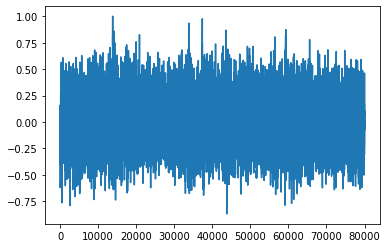

In [5]:
samplerate, data = wavfile.read('car.wav')
data = data[samplerate * 15:samplerate * 25,0]

fs = 8000
data = scipy.signal.resample(data, int(len(data) * fs / samplerate))

data = np.reshape(data, (-1, 1))
data = data / max(data)
data = np.reshape(data, -1)


fs = 8000
t = np.arange(0,5,1/fs)
f = 2000
env = pyroad.Environment(fs = fs)
# src_signal = np.sin(2 * np.pi * f * t)
src_signal = data
# src_signal = np.random.randn(len(t))
env.add_source(np.array([3,5,0.5]), trajectory_points=np.array([[3,30,0.5], [3,-30,0.5]]), source_velocity=np.array([10]), signal=src_signal)
env.add_microphone_array(np.array([[0,0,1]]))
# env.set_background_noise(SNR=0)
env.set_simulation_params("Allpass", True, True)
import time
start_time = time.time()
signal = env.simulate()
print(time.time() - start_time)
# Run simulation and plot signals received at microphone array
import matplotlib.pyplot as plt
plt.plot(np.arange(len(signal[0]))/fs, signal[0])
plt.title('Received Signal')
plt.xlabel('Time [s]')

from scipy.io.wavfile import write
ff, tt, Sxx = scipy.signal.spectrogram(signal[0], fs = fs)
plt.pcolormesh(tt, ff, Sxx, shading='auto', vmax = 0.00002)
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
write('output.wav', fs, signal[0])

plt.figure()
plt.plot(data)


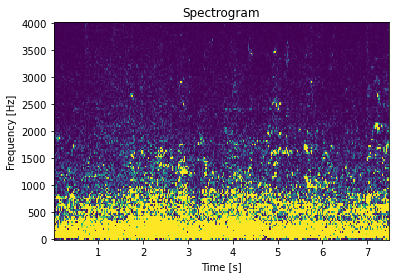

In [6]:
from scipy.io.wavfile import write
ff, tt, Sxx = scipy.signal.spectrogram(noise, fs = fs)
plt.pcolormesh(tt, ff, Sxx, shading='auto', vmax = 0.000002)
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
write('output.wav', fs, signal[0])

In [13]:
A = np.random.randn(11)
B = np.random.randn(11)

def multiply_loop(A,B):
    res = 0
    for i in range(11):
        res = res + A[i]*B[i]
    return res

def multiply_vector(A,B):
    return A @ B

%timeit multiply_vector(A,B)
%timeit multiply_loop(A,B)
%timeit A.dot(B)

# print(c)
# print(d)

488 ns ± 1.43 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.8 µs ± 9.32 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
244 ns ± 1.16 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [12]:
from collections import deque
que = deque([1,2,3,4,5,6,7,8,9,10,11], maxlen = 11)
que.append(12)
print(list(que))
r = np.random.randn(11)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


37.07384648047084